# Some general explorations of US stock market

*Haiyang Yu, 02/28/2018*



In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})

import sys
sys.path.append('../src/utils/')
from configure import *
from mod_dataprep import *

In [2]:
fslist

'http://129.49.67.246/stock/histdata/daily//stocks_list.csv'

In [3]:
ss = pd.read_csv(fslist)
print(format(len(ss)))
ss.head(5)

6784


,Unnamed: 0,Exchange,Symbol,Exist,Start_date,End_date,Name,LastSale,MarketCap,IPOyear,Sector,industry
0,0,NASDAQ,AABA,1,1996-04-12,2018-03-02,Altaba Inc.,71.31,$62.28B,NaN,Technology,EDP Services
1,1,NASDAQ,AAL,1,2005-09-27,2018-03-02,"American Airlines Group, Inc.",50.87,$24.34B,NaN,Transportation,Air Freight/Delivery Services
2,2,NASDAQ,AAME,1,1980-03-17,2018-03-01,Atlantic American Corporation,3.25,$66.43M,NaN,Finance,Life Insurance
3,3,NASDAQ,AAOI,1,2013-09-26,2018-03-02,"Applied Optoelectronics, Inc.",29.51,$571.97M,2013.0,Technology,Semiconductors
4,4,NASDAQ,AAON,1,1992-12-16,2018-03-02,"AAON, Inc.",33.90,$1.78B,NaN,Capital Goods,Industrial Machinery/Components


In [4]:
capnum = [capstr2num(x) for x in ss['MarketCap'].values ]
ss['MarketCap'] = capnum
ss[10:16]

,Unnamed: 0,Exchange,Symbol,Exist,Start_date,End_date,Name,LastSale,MarketCap,IPOyear,Sector,industry
10,10,NASDAQ,ABAX,1,1992-01-23,2018-03-02,"ABAXIS, Inc.",65.510,1.490000e+09,1992.0,Capital Goods,Industrial Machinery/Components
11,11,NASDAQ,ABCB,1,1994-05-19,2018-03-02,Ameris Bancorp,52.600,1.970000e+09,1994.0,Finance,Major Banks
12,12,NASDAQ,ABCD,1,2009-12-09,2018-03-02,"Cambium Learning Group, Inc.",7.190,3.355600e+08,NaN,Consumer Services,Publishing
13,13,NASDAQ,ABDC,1,2014-05-09,2018-03-02,Alcentra Capital Corp.,7.585,1.080500e+08,NaN,NaN,NaN
14,14,NASDAQ,ABEO,1,1980-09-19,2018-03-02,Abeona Therapeutics Inc.,11.900,5.566300e+08,NaN,Health Care,Major Pharmaceuticals
15,15,NASDAQ,ABEOW,0,---,---,Abeona Therapeutics Inc.,7.200,NaN,NaN,Health Care,Major Pharmaceuticals


In [5]:
ss.groupby('Exchange').sum()[  ['Exist', 'MarketCap'] ]

,Exist,MarketCap
Exchange,,
AMEX,311,1.240180e+11
NASDAQ,3166,1.315292e+13
NYSE,2625,2.873520e+13


In [16]:
ss[ss['Sector']=='Technology'].sort_values(['MarketCap'], ascending=False).head(10)[:]

,Unnamed: 0,Exchange,Symbol,Exist,Start_date,End_date,Name,LastSale,MarketCap,IPOyear,Sector,industry
5,5,NASDAQ,AAPL,1,1980-12-12,2018-03-02,Apple Inc.,164.34,8.338600e+11,1980.0,Technology,Computer Manufacturing
1323,1323,NASDAQ,GOOGL,1,2004-08-19,2018-03-02,Alphabet Inc.,1054.14,7.329400e+11,NaN,Technology,"Computer Software: Programming, Data Processing"
1322,1322,NASDAQ,GOOG,1,2004-08-19,2018-03-02,Alphabet Inc.,1052.10,7.315200e+11,2004.0,Technology,"Computer Software: Programming, Data Processing"
1992,1992,NASDAQ,MSFT,1,1986-03-13,2018-03-02,Microsoft Corporation,89.83,6.916700e+11,1986.0,Technology,Computer Software: Prepackaged Software
1058,1058,NASDAQ,FB,1,2012-05-18,2018-03-02,"Facebook, Inc.",173.15,5.030000e+11,2012.0,Technology,"Computer Software: Programming, Data Processing"
6135,6135,NYSE,TSM,1,1997-10-09,2018-03-05,Taiwan Semiconductor Manufacturing Company Ltd.,42.38,2.197900e+11,1997.0,Technology,Semiconductors
1565,1565,NASDAQ,INTC,1,1980-03-17,2018-03-02,Intel Corporation,44.46,2.080700e+11,NaN,Technology,Semiconductors
725,725,NASDAQ,CSCO,1,1990-02-16,2018-03-02,"Cisco Systems, Inc.",41.23,2.038300e+11,1990.0,Technology,Computer Communications Equipment
5453,5453,NYSE,ORCL,1,1986-03-12,2018-03-05,Oracle Corporation,48.49,2.007300e+11,1986.0,Technology,Computer Software: Prepackaged Software
2128,2128,NASDAQ,NVDA,1,1999-01-22,2018-03-02,NVIDIA Corporation,232.63,1.409700e+11,1999.0,Technology,Semiconductors


In [6]:
x = ss.groupby(['Sector'] ).sum()[  ['Exist', 'MarketCap'] ]
x

,Exist,MarketCap
Sector,,
Basic Industries,317,2.114924e+12
Capital Goods,372,2.695126e+12
Consumer Durables,139,4.221904e+11
Consumer Non-Durables,231,2.461541e+12
Consumer Services,806,5.601554e+12
Energy,312,3.011247e+12
Finance,961,6.609852e+12
Health Care,789,4.896971e+12
Miscellaneous,143,1.693871e+12


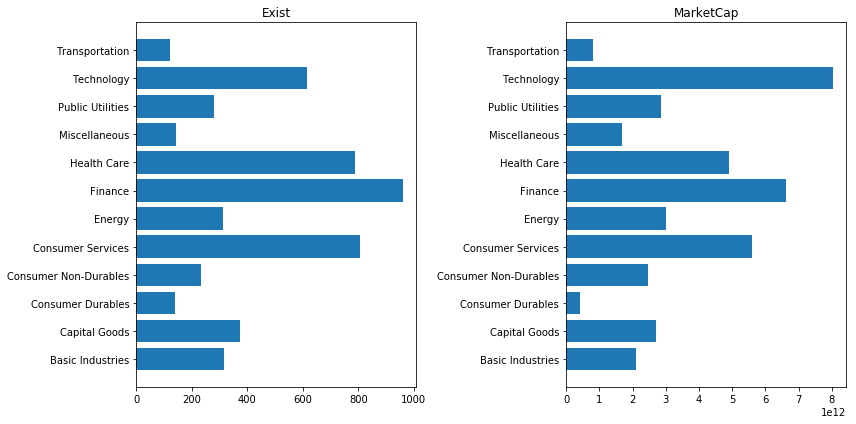

Index(['Exist', 'MarketCap'], dtype='object')


In [7]:
plt.figure(1, figsize=(12, 6))
for i in range(len(x.columns)):
    plt.subplot(1,2,i+1)
    plt.barh( range(len(x)), x[x.columns[i]].values)
    plt.yticks(range(len(x)), x.index.values)
    plt.title(x.columns[i])

plt.tight_layout()
plt.show()

print(x.columns[:])

In [8]:
x0 = ss.groupby(['Exchange','Sector'] ).sum()[  ['Exist', 'MarketCap'] ]
x0

Exist     MarketCap
Exchange Sector                                    
AMEX     Basic Industries          47  1.576230e+10
         Capital Goods             20  1.411580e+09
         Consumer Durables          4  1.037290e+09
         Consumer Non-Durables     14  1.085460e+09
         Consumer Services         30  4.685080e+09
         Energy                    29  3.085855e+10
         Finance                   14  9.699550e+09
         Health Care               45  4.100748e+09
         Miscellaneous              5  4.191700e+08
         Public Utilities          10  3.756446e+10
         Technology                19  1.089280e+09
         Transportation             1  1.781200e+08
NASDAQ   Basic Industries          75  6.747245e+10
         Capital Goods            170  3.081694e+11
         Consumer Durables         77  7.015999e+10
         Consumer Non-Durables    110  4.688188e+11
         Consumer Services        340  2.359261e+12
         Energy                    62  5.810683e+10
         Finance                  609  8.389700e+11
         Health Care              642  1.577505e+12
         Miscellaneous             89  3.972072e+11
         Public Utilities          64  2.429424e+11
         Technology               434  6.126930e+12
         Transportation            52  1.923575e+11
NYSE     Basic Industries         195  2.031690e+12
         Capital Goods            182  2.385545e+12
         Consumer Durables         58  3.509931e+11
         Consumer Non-Durables    107  1.991637e+12
         Consumer Services        436  3.237607e+12
         Energy                   221  2.922281e+12
         Finance                  338  5.761183e+12
         Health Care              102  3.315364e+12
         Miscellaneous             49  1.296245e+12
         Public Utilities         205  2.561451e+12
         Technology               163  1.901215e+12
         Transportation            67  6.289766e+11

/home/oscar/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


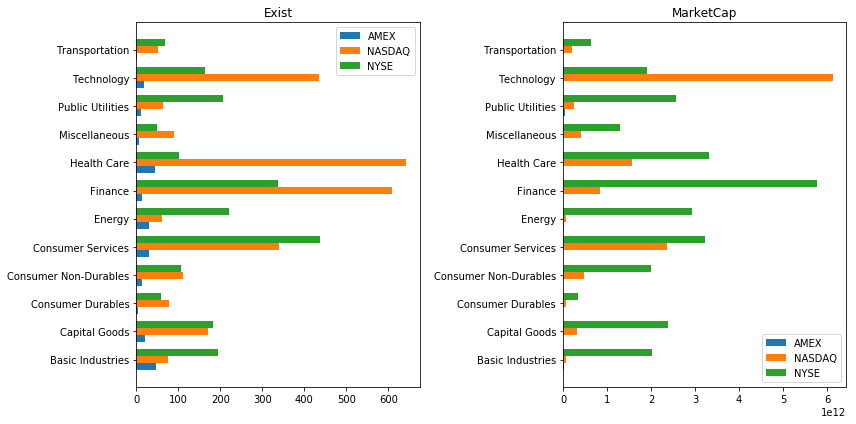

In [9]:
plt.figure(1, figsize=(12, 6))
for k in range( len(x0.index.levels[0].values) ):
    e = x0.index.levels[0].values[k]
    x = x0.loc[e]
    for i in range(len(x.columns)):
        plt.subplot(1,2,i+1)
        plt.barh( np.arange(len(x))+k*0.25, x[x.columns[i]].values, height=0.25)

        if k==2:
            plt.yticks(np.arange(len(x))+0.25, x.index.values)
            plt.title(x.columns[i])
            plt.legend(x0.index.levels[0].values, loc='best')
            
plt.tight_layout()
plt.show()

In [10]:
x = ss.groupby('IPOyear').sum()[ ['Exist', 'MarketCap'] ]
x

,Exist,MarketCap
IPOyear,,
1972.0,4,5.600379e+10
1973.0,1,1.680000e+09
1980.0,2,8.501800e+11
1981.0,5,1.619762e+10
1982.0,4,3.121320e+09
1983.0,11,1.760993e+11
1984.0,4,3.355009e+10
1985.0,3,3.900841e+10
1986.0,37,1.125805e+12


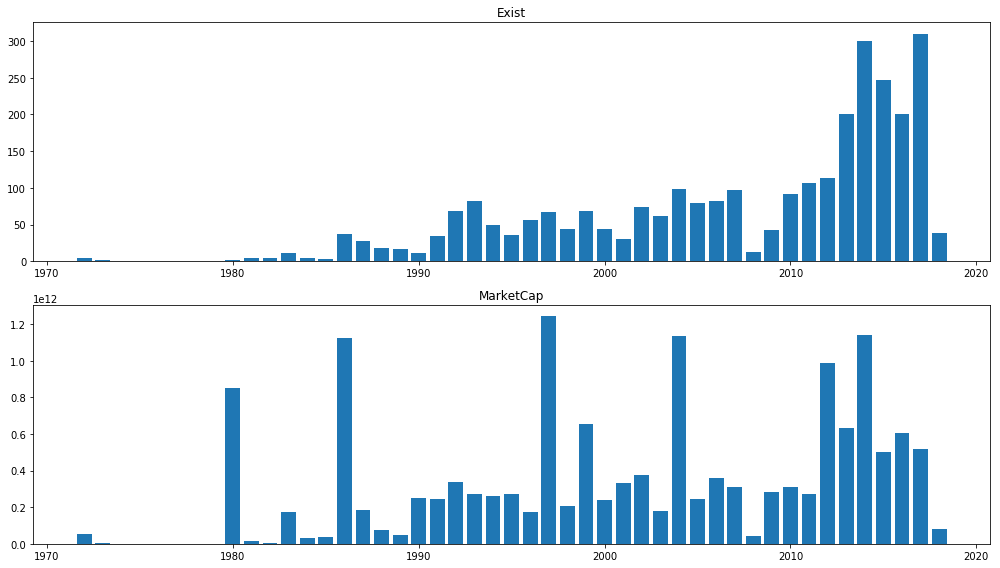

In [11]:
plt.figure(1, figsize=(14, 8))
for i in range(len(x.columns)):
    plt.subplot(2,1,i+1)
    plt.bar( x.index.values, x[x.columns[i]].values)
    #plt.yticks(range(len(x)), x.index.values)
    plt.title(x.columns[i])

plt.tight_layout()
plt.show()


In [12]:
ss = ss.replace(to_replace='---', value=np.nan)
ss['Start_date'] = pd.to_datetime(ss['Start_date'])
ss['End_date'] = pd.to_datetime(ss['End_date'])
ss[11:17]

,Unnamed: 0,Exchange,Symbol,Exist,Start_date,End_date,Name,LastSale,MarketCap,IPOyear,Sector,industry
11,11,NASDAQ,ABCB,1,1994-05-19,2018-03-02,Ameris Bancorp,52.600,1.970000e+09,1994.0,Finance,Major Banks
12,12,NASDAQ,ABCD,1,2009-12-09,2018-03-02,"Cambium Learning Group, Inc.",7.190,3.355600e+08,NaN,Consumer Services,Publishing
13,13,NASDAQ,ABDC,1,2014-05-09,2018-03-02,Alcentra Capital Corp.,7.585,1.080500e+08,NaN,NaN,NaN
14,14,NASDAQ,ABEO,1,1980-09-19,2018-03-02,Abeona Therapeutics Inc.,11.900,5.566300e+08,NaN,Health Care,Major Pharmaceuticals
15,15,NASDAQ,ABEOW,0,NaT,NaT,Abeona Therapeutics Inc.,7.200,NaN,NaN,Health Care,Major Pharmaceuticals
16,16,NASDAQ,ABIL,1,2014-02-05,2018-03-02,Ability Inc.,0.381,9.810000e+06,2014.0,Finance,Business Services


In [25]:
ss['Start_year'] = ss['Start_date'].dt.to_period('Y')
ss[11:17]

,Unnamed: 0,Exchange,Symbol,Exist,Start_date,End_date,Name,LastSale,MarketCap,IPOyear,Sector,industry,Start_year
11,11,NASDAQ,ABCB,1,1994-05-19,2018-03-02,Ameris Bancorp,52.600,1.970000e+09,1994.0,Finance,Major Banks,1994
12,12,NASDAQ,ABCD,1,2009-12-09,2018-03-02,"Cambium Learning Group, Inc.",7.190,3.355600e+08,NaN,Consumer Services,Publishing,2009
13,13,NASDAQ,ABDC,1,2014-05-09,2018-03-02,Alcentra Capital Corp.,7.585,1.080500e+08,NaN,NaN,NaN,2014
14,14,NASDAQ,ABEO,1,1980-09-19,2018-03-02,Abeona Therapeutics Inc.,11.900,5.566300e+08,NaN,Health Care,Major Pharmaceuticals,1980
15,15,NASDAQ,ABEOW,0,NaT,NaT,Abeona Therapeutics Inc.,7.200,NaN,NaN,Health Care,Major Pharmaceuticals,NaT
16,16,NASDAQ,ABIL,1,2014-02-05,2018-03-02,Ability Inc.,0.381,9.810000e+06,2014.0,Finance,Business Services,2014


In [26]:
x = ss.groupby('Start_year').sum()[ ['Exist', 'MarketCap'] ]
x

,Exist,MarketCap
Start_year,,
1962,9,9.597600e+11
1970,20,1.987370e+12
1972,22,1.741620e+12
1973,26,3.153224e+11
1974,1,5.972000e+10
1975,1,2.964000e+07
1976,1,1.983900e+11
1977,10,6.572432e+11
1978,3,6.463497e+10


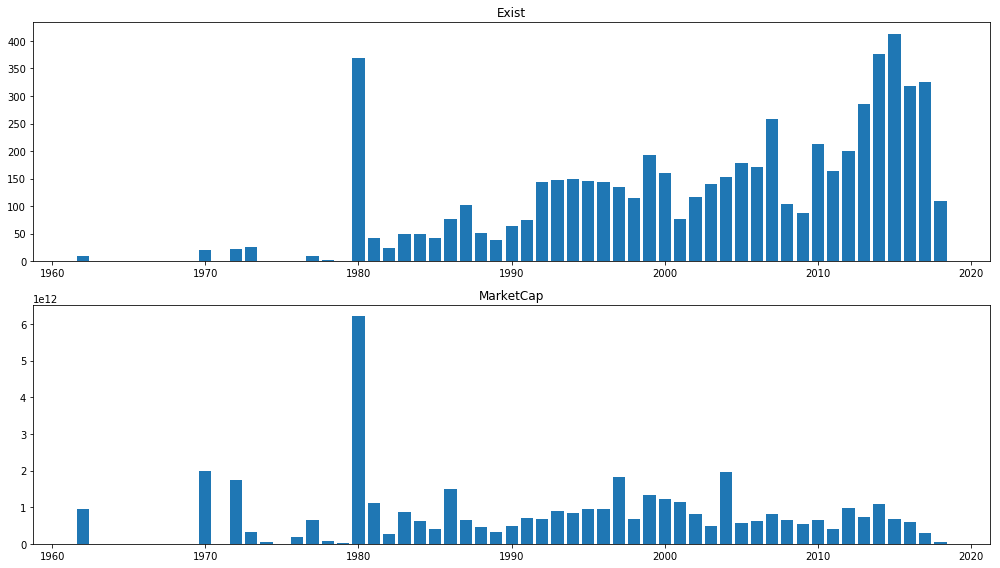

In [27]:
plt.figure(1, figsize=(14, 8))
for i in range(len(x.columns)):
    plt.subplot(2,1,i+1)
    plt.bar( x.index.astype(int)+1970, x[x.columns[i]].values)
    #plt.yticks(range(len(x)), x.index.values)
    plt.title(x.columns[i])

plt.tight_layout()
plt.show()


/home/oscar/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


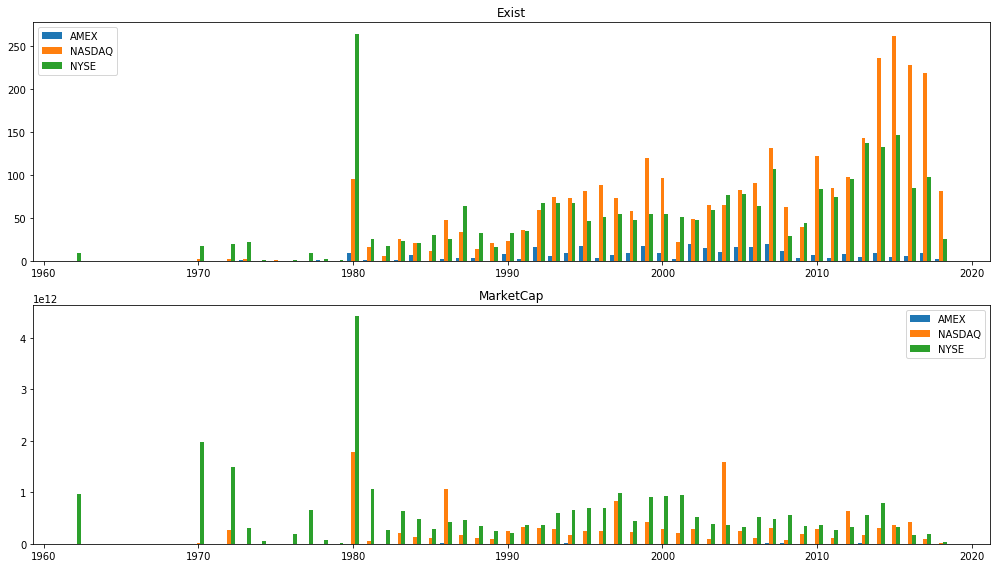

In [28]:
x0 = ss.groupby(['Exchange','Start_year'] ).sum()[  ['Exist', 'MarketCap'] ]
plt.figure(1, figsize=(14, 8))
for k in range( len(x0.index.levels[0].values) ):
    e = x0.index.levels[0].values[k]
    x = x0.loc[e]
    for i in range(len(x.columns)):
        plt.subplot(2,1,i+1)
        plt.bar( x.index.astype(int)+1970+(k-1)*0.25, x[x.columns[i]].values, width=0.25)
        if k==2:
            plt.title(x.columns[i])
            plt.legend(x0.index.levels[0].values, loc='best')
            
plt.tight_layout()
plt.show()

In [29]:
ss.shape

(6784, 13)

In [17]:
ss.sort_values('MarketCap', ascending=False).head(10)

,Unnamed: 0,Exchange,Symbol,Exist,Start_date,End_date,Name,LastSale,MarketCap,IPOyear,Sector,industry
5,5,NASDAQ,AAPL,1,1980-12-12,2018-03-02,Apple Inc.,164.34,8.338600e+11,1980.0,Technology,Computer Manufacturing
1323,1323,NASDAQ,GOOGL,1,2004-08-19,2018-03-02,Alphabet Inc.,1054.14,7.329400e+11,NaN,Technology,"Computer Software: Programming, Data Processing"
1322,1322,NASDAQ,GOOG,1,2004-08-19,2018-03-02,Alphabet Inc.,1052.10,7.315200e+11,2004.0,Technology,"Computer Software: Programming, Data Processing"
1992,1992,NASDAQ,MSFT,1,1986-03-13,2018-03-02,Microsoft Corporation,89.83,6.916700e+11,1986.0,Technology,Computer Software: Prepackaged Software
175,175,NASDAQ,AMZN,1,1997-05-15,2018-03-02,"Amazon.com, Inc.",1414.51,6.847700e+11,1997.0,Consumer Services,Catalog/Specialty Distribution
1058,1058,NASDAQ,FB,1,2012-05-18,2018-03-02,"Facebook, Inc.",173.15,5.030000e+11,2012.0,Technology,"Computer Software: Programming, Data Processing"
3564,3564,NYSE,BABA,1,2014-09-19,2018-03-05,Alibaba Group Holding Limited,179.25,4.599300e+11,2014.0,Miscellaneous,Business Services
4857,4857,NYSE,JPM,1,1980-03-17,2018-03-05,J P Morgan Chase & Co,112.43,3.851100e+11,NaN,Finance,Major Banks
4849,4849,NYSE,JNJ,1,1970-01-02,2018-03-05,Johnson & Johnson,129.96,3.491400e+11,NaN,Health Care,Major Pharmaceuticals
6397,6397,NYSE,XOM,1,1970-01-02,2018-03-05,Exxon Mobil Corporation,76.30,3.234400e+11,NaN,Energy,Integrated oil Companies


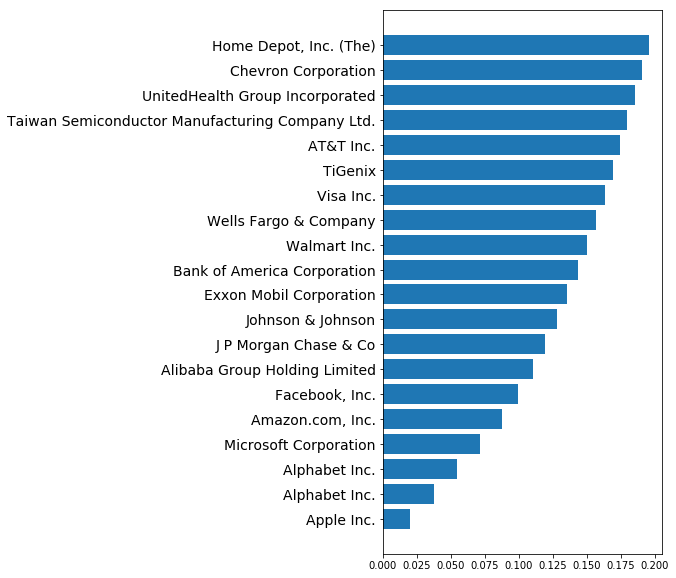

In [18]:
ntop = 20
tops = ss.sort_values('MarketCap', ascending=False).head(ntop)['Name']
topp = ss.sort_values('MarketCap', ascending=False).head(ntop)['MarketCap']
topp = np.cumsum(topp)/ss['MarketCap'].sum()

plt.figure(1, figsize=(5,10))
plt.barh(range(ntop), topp)
plt.yticks(range(ntop), tops, fontsize=14)
plt.show()

In [32]:
x = ss[ss['Sector']=='Technology'].describe()
x.loc[:,:]

,Unnamed: 0,Exist,LastSale,MarketCap,IPOyear
count,618.000000,618.000000,618.000000,6.110000e+02,393.000000
mean,2724.598706,0.996764,39.467854,1.314114e+10,2005.653944
std,1841.965022,0.056842,72.429131,6.703418e+10,9.854935
min,0.000000,0.000000,0.281000,1.436960e+05,1972.000000
25%,1286.750000,1.000000,6.727500,1.818250e+08,1997.000000
50%,2461.500000,1.000000,20.935000,1.150000e+09,2009.000000
75%,3894.500000,1.000000,47.240000,4.830000e+09,2014.000000
max,6782.000000,1.000000,1054.140000,8.338600e+11,2018.000000


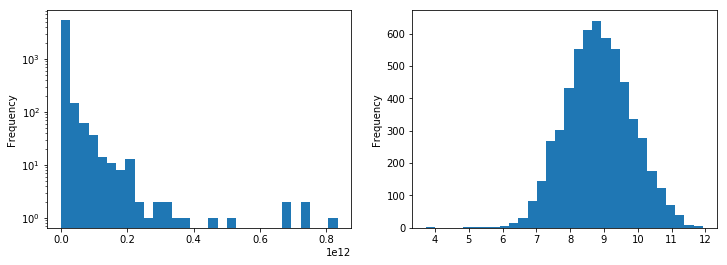

In [33]:
x = ss['MarketCap']

plt.figure(1, figsize=(12,4))
plt.subplot(1,2,1)
x.plot.hist(bins=30, logy=True)

plt.subplot(1,2,2)
x = np.log(x)/np.log(10.0)
x.plot.hist(bins=30)

plt.show()

In [34]:
ss['Sector'] = ss['Sector'].astype('category')
ss['Sector'].cat.categories

Index(['Basic Industries', 'Capital Goods', 'Consumer Durables',
       'Consumer Non-Durables', 'Consumer Services', 'Energy', 'Finance',
       'Health Care', 'Miscellaneous', 'Public Utilities', 'Technology',
       'Transportation'],
      dtype='object')

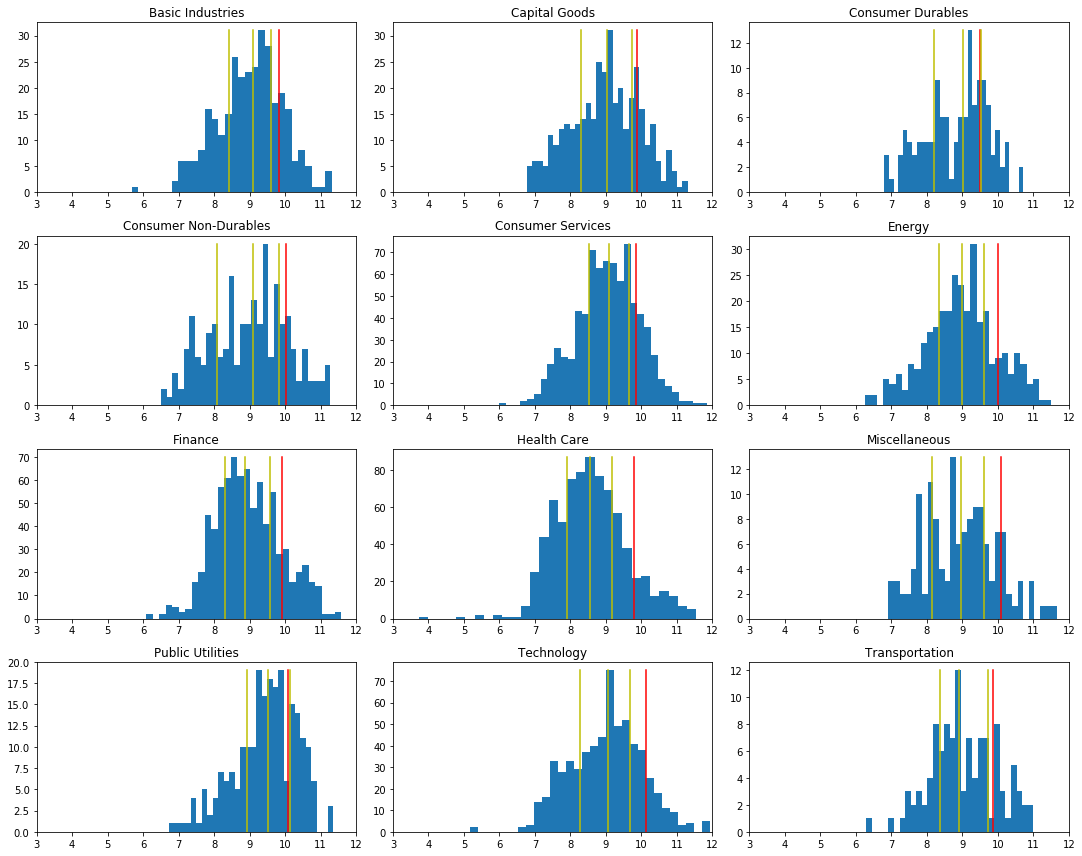

In [35]:
plt.figure(1, figsize=(15,12))
seclist = ss['Sector'].cat.categories
for i in range(len(seclist)):
    ax = plt.subplot(4,3,i+1)
    x = ss[ss['Sector']==seclist[i]]['MarketCap'].dropna()
    xdes = x.describe()
    x = np.log(x)/np.log(10.0)
    n, bins, pack = plt.hist(np.array(x.astype('float64')), bins=30)
    plt.plot([np.log(xdes.loc['mean'])/np.log(10.0)]*2, [0, max(n)], 'r')
    plt.plot([np.log(xdes.loc['25%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    plt.plot([np.log(xdes.loc['50%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    plt.plot([np.log(xdes.loc['75%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    ax.set_xlim([3,12])
    plt.title(seclist[i])
plt.tight_layout()
plt.show()

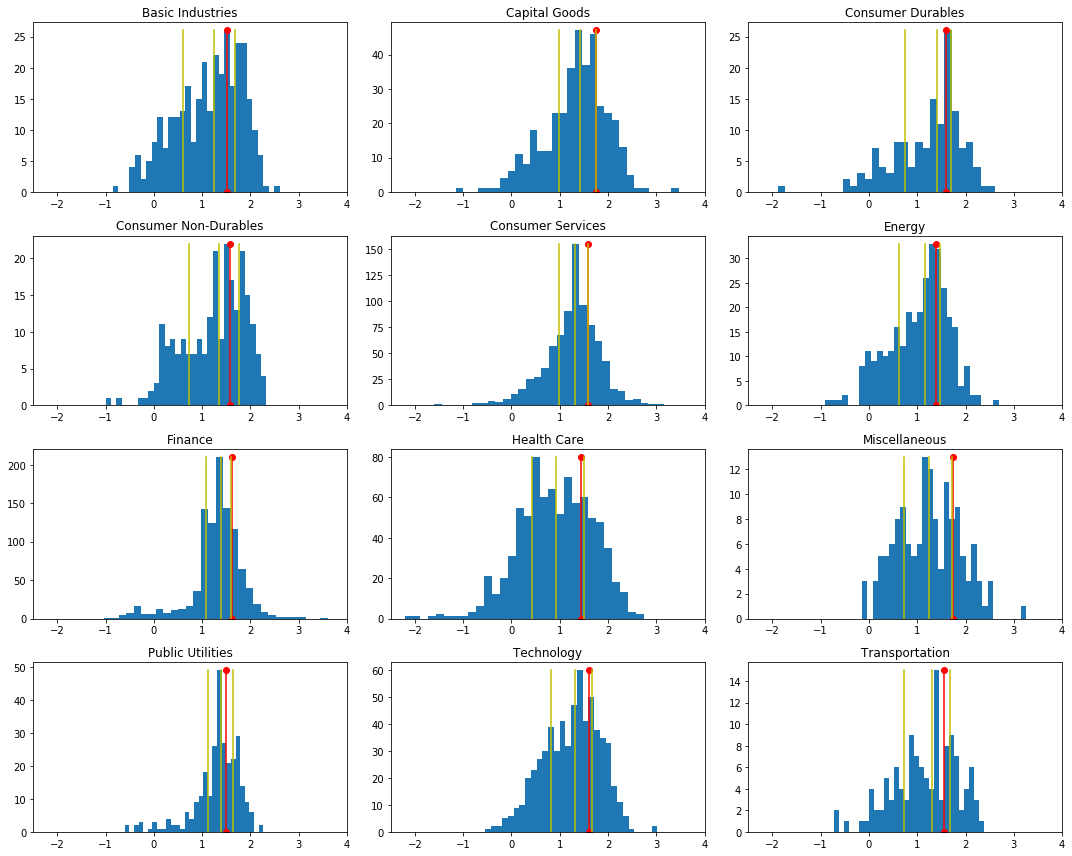

In [36]:
plt.figure(1, figsize=(15,12))
seclist = ss['Sector'].cat.categories
for i in range(len(seclist)):
    ax = plt.subplot(4,3,i+1)
    x = ss[ss['Sector']==seclist[i]]['LastSale'].dropna()
    xdes = x.describe()
    x = np.log(x)/np.log(10.0)
    n, bins, pack = plt.hist(np.array(x), bins=30)
    plt.plot([np.log(xdes.loc['mean'])/np.log(10.0)]*2, [0, max(n)], 'r-o')
    plt.plot([np.log(xdes.loc['25%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    plt.plot([np.log(xdes.loc['50%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    plt.plot([np.log(xdes.loc['75%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    ax.set_xlim([-2.5, 4])
    #plt.axis([-2.5,4,0,220])
    plt.title(seclist[i])
plt.tight_layout()
plt.show()

In [37]:
ss.sort_values('LastSale', ascending=False).head(10)

,Unnamed: 0,Exchange,Symbol,Exist,Start_date,End_date,Name,LastSale,MarketCap,IPOyear,Sector,industry,Start_year
6724,6724,AMEX,SEB,1,1980-03-17,2018-03-05,Seaboard Corporation,4021.240,4.710000e+09,1996.0,Finance,Investment Bankers/Brokers/Service,1980
5383,5383,NYSE,NVR,1,1985-07-22,2018-03-05,"NVR, Inc.",2915.020,1.076000e+10,NaN,Capital Goods,Homebuilding,1985
2278,2278,NASDAQ,PCLN,1,1999-03-31,2018-03-02,The Priceline Group Inc.,1797.860,8.768000e+10,1999.0,Miscellaneous,Business Services,1999
175,175,NASDAQ,AMZN,1,1997-05-15,2018-03-02,"Amazon.com, Inc.",1414.510,6.847700e+11,1997.0,Consumer Services,Catalog/Specialty Distribution,1997
1375,1375,NASDAQ,HBANP,1,2008-04-17,2018-02-22,Huntington Bancshares Incorporated,1321.000,NaN,NaN,Finance,Major Banks,2008
6316,6316,NYSE,WFC^L,0,NaT,NaT,Wells Fargo & Company,1267.691,NaN,NaN,NaN,NaN,NaT
3573,3573,NYSE,BAC^L,0,NaT,NaT,Bank of America Corporation,1236.000,NaN,NaN,NaN,NaN,NaT
5120,5120,NYSE,MKL,1,1986-12-12,2018-03-05,Markel Corporation,1097.520,1.525000e+10,1986.0,Finance,Property-Casualty Insurers,1986
3803,3803,NYSE,CCI^A,0,NaT,NaT,Crown Castle International Corporation,1079.760,NaN,NaN,NaN,NaN,NaT
1323,1323,NASDAQ,GOOGL,1,2004-08-19,2018-03-02,Alphabet Inc.,1054.140,7.329400e+11,NaN,Technology,"Computer Software: Programming, Data Processing",2004


In [19]:
ss.sort_values('LastSale', ascending=True).head(20)

,Unnamed: 0,Exchange,Symbol,Exist,Start_date,End_date,Name,LastSale,MarketCap,IPOyear,Sector,industry
791,791,NASDAQ,CYHHZ,1,2018-03-02,2018-03-02,"Community Health Systems, Inc.",0.0061,NaN,NaN,Health Care,Hospital/Nursing Management
25,25,NASDAQ,ACERW,0,---,---,Acer Therapeutics Inc.,0.0100,NaN,NaN,Health Care,Major Pharmaceuticals
1628,1628,NASDAQ,JASNW,0,---,---,"Jason Industries, Inc.",0.0129,NaN,2013.0,Consumer Durables,Miscellaneous manufacturing industries
799,799,NASDAQ,CYTXW,0,---,---,Cytori Therapeutics Inc,0.0250,NaN,NaN,Health Care,Medical/Dental Instruments
3178,3178,NASDAQ,WHLRW,0,---,---,"Wheeler Real Estate Investment Trust, Inc.",0.0252,NaN,NaN,Consumer Services,Real Estate Investment Trusts
2205,2205,NASDAQ,ONSIZ,1,2016-09-07,2018-03-02,"Oncobiologics, Inc.",0.0329,NaN,2016.0,Health Care,Biotechnology: Biological Products (No Diagnos...
2204,2204,NASDAQ,ONSIW,0,---,---,"Oncobiologics, Inc.",0.0350,NaN,2016.0,Health Care,Biotechnology: Biological Products (No Diagnos...
2123,2123,NASDAQ,NUROW,0,---,---,"NeuroMetrix, Inc.",0.0416,NaN,NaN,Health Care,Medical/Dental Instruments
1919,1919,NASDAQ,MICTW,0,---,---,"Micronet Enertec Technologies, Inc.",0.0700,NaN,NaN,Capital Goods,Electrical Products
1042,1042,NASDAQ,EYEGW,0,---,---,"Eyegate Pharmaceuticals, Inc.",0.0800,NaN,NaN,Health Care,Major Pharmaceuticals


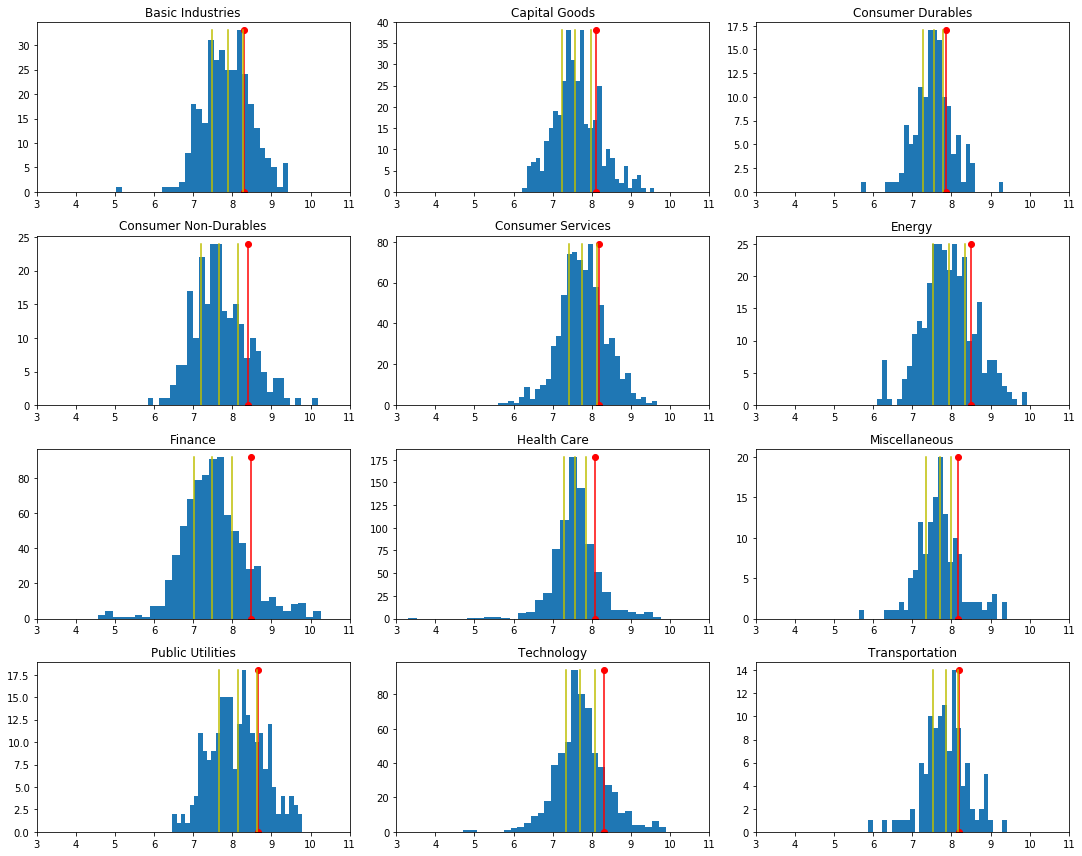

In [39]:
plt.figure(1, figsize=(15,12))
seclist = ss['Sector'].cat.categories
for i in range(len(seclist)):
    ax = plt.subplot(4,3,i+1)
    x = (ss[ss['Sector']==seclist[i]]['MarketCap'] / ss[ss['Sector']==seclist[i]]['LastSale']).dropna()
    xdes = x.describe()
    x = np.log(x)/np.log(10.0)
    n, bins, pack = plt.hist(np.array(x), bins=30)
    plt.plot([np.log(xdes.loc['mean'])/np.log(10.0)]*2, [0, max(n)], 'r-o')
    plt.plot([np.log(xdes.loc['25%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    plt.plot([np.log(xdes.loc['50%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    plt.plot([np.log(xdes.loc['75%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    ax.set_xlim([3, 11])
    #plt.axis([-2.5,4,0,220])
    plt.title(seclist[i])
plt.tight_layout()
plt.show()

In [40]:
x = ss[ss['Sector'] == 'Finance'].groupby(['industry']).sum()[['Exist','MarketCap']]
x['mean_cap'] = x['MarketCap'] / x['Exist']
x.sort_values('Exist', ascending=False)

,Exist,MarketCap,mean_cap
industry,,,
Major Banks,336,2.618869e+12,7.794254e+09
Property-Casualty Insurers,95,4.531487e+11,4.769986e+09
Business Services,93,1.440299e+10,1.548709e+08
Savings Institutions,73,2.658586e+11,3.641899e+09
Finance: Consumer Services,69,3.154542e+11,4.571800e+09
Investment Bankers/Brokers/Service,61,6.894026e+11,1.130168e+10
Commercial Banks,47,1.287812e+12,2.740026e+10
Investment Managers,47,2.108067e+11,4.485249e+09
Real Estate,45,8.809450e+10,1.957656e+09


In [41]:
x = ss[ss['Sector'] == 'Technology'].groupby(['industry']).sum()[['Exist','MarketCap']]
x['mean_cap'] = x['MarketCap'] / x['Exist']
x.sort_values('Exist', ascending=False)

,Exist,MarketCap,mean_cap
industry,,,
Computer Software: Prepackaged Software,145,1.814322e+12,1.251257e+10
EDP Services,117,5.489787e+11,4.692126e+09
Semiconductors,106,1.233816e+12,1.163977e+10
Industrial Machinery/Components,42,2.888637e+11,6.877708e+09
"Computer Software: Programming, Data Processing",39,2.250563e+12,5.770673e+10
Radio And Television Broadcasting And Communications Equipment,37,3.114814e+11,8.418417e+09
Diversified Commercial Services,24,4.532412e+10,1.888505e+09
Professional Services,19,3.099267e+10,1.631193e+09
Computer peripheral equipment,17,4.295734e+10,2.526902e+09


In [42]:
x = ss[ss['Sector'] == 'Consumer Services'].groupby(['industry']).sum()[['Exist','MarketCap']]
x['mean_cap'] = x['MarketCap'] / x['Exist']
x.sort_values('Exist', ascending=False)

,Exist,MarketCap,mean_cap
industry,,,
Real Estate Investment Trusts,234,1.018024e+12,4.350529e+09
Other Consumer Services,64,1.502352e+11,2.347425e+09
Restaurants,59,3.380942e+11,5.730409e+09
Other Specialty Stores,36,1.666531e+11,4.629252e+09
Clothing/Shoe/Accessory Stores,35,1.468454e+11,4.195583e+09
Hotels/Resorts,33,2.851778e+11,8.641751e+09
Television Services,32,8.803321e+11,2.751038e+10
Broadcasting,28,8.240074e+10,2.942884e+09
Marine Transportation,25,1.846716e+11,7.386863e+09


In [43]:
x = ss[ss['Sector'] == 'Health Care'].groupby(['industry']).sum()[['Exist','MarketCap']]
x['mean_cap'] = x['MarketCap'] / x['Exist']
x.sort_values('Exist', ascending=False)

,Exist,MarketCap,mean_cap
industry,,,
Major Pharmaceuticals,409,2.699298e+12,6.599751e+09
Medical/Dental Instruments,94,4.381719e+11,4.661404e+09
Biotechnology: Biological Products (No Diagnostic Substances),92,4.060250e+11,4.413316e+09
Medical Specialities,34,5.251433e+11,1.544539e+10
Hospital/Nursing Management,29,1.224976e+11,4.224054e+09
Biotechnology: Electromedical & Electrotherapeutic Apparatus,28,1.349386e+11,4.819235e+09
Industrial Specialties,26,1.487959e+11,5.722921e+09
Biotechnology: Commercial Physical & Biological Resarch,24,8.162164e+10,3.400902e+09
Biotechnology: In Vitro & In Vivo Diagnostic Substances,22,2.852375e+10,1.296534e+09


In [44]:
x = ss.groupby(['industry']).sum()[['Exist','MarketCap']]
x['mean_cap'] = x['MarketCap'] / x['Exist']
x.sort_values('MarketCap', ascending=False).head(30)

,Exist,MarketCap,mean_cap
industry,,,
Major Pharmaceuticals,409,2.699298e+12,6.599751e+09
Major Banks,336,2.618869e+12,7.794254e+09
"Computer Software: Programming, Data Processing",39,2.250563e+12,5.770673e+10
Computer Software: Prepackaged Software,145,1.814322e+12,1.251257e+10
Business Services,181,1.610378e+12,8.897117e+09
Telecommunications Equipment,132,1.504001e+12,1.139395e+10
Commercial Banks,47,1.287812e+12,2.740026e+10
Semiconductors,106,1.233816e+12,1.163977e+10
Integrated oil Companies,23,1.154150e+12,5.018043e+10


In [45]:
x = ss.groupby(['industry']).sum()[['Exist','MarketCap']]
x['mean_cap'] = x['MarketCap'] / x['Exist']
x.sort_values('MarketCap', ascending=True).head(30)

,Exist,MarketCap,mean_cap
industry,,,
Diversified Electronic Products,1,6.470000e+06,6.470000e+06
Consumer: Greeting Cards,1,1.806600e+08,1.806600e+08
Tobacco,1,4.141600e+08,4.141600e+08
Other Transportation,1,5.759600e+08,5.759600e+08
Precision Instruments,1,5.910100e+08,5.910100e+08
Finance/Investors Services,7,6.989900e+08,9.985571e+07
Miscellaneous,6,9.568200e+08,1.594700e+08
Wholesale Distributors,2,1.005750e+09,5.028750e+08
General Bldg Contractors - Nonresidential Bldgs,1,1.110000e+09,1.110000e+09


In [46]:
ss[ss['industry'] == 'Major Banks'].sort_values('MarketCap', ascending=False).head(10)

,Unnamed: 0,Exchange,Symbol,Exist,Start_date,End_date,Name,LastSale,MarketCap,IPOyear,Sector,industry,Start_year
4857,4857,NYSE,JPM,1,1980-03-17,2018-03-05,J P Morgan Chase & Co,112.43,3.851100e+11,NaN,Finance,Major Banks,1980
3565,3565,NYSE,BAC,1,1980-03-17,2018-03-05,Bank of America Corporation,31.18,3.207600e+11,NaN,Finance,Major Banks,1980
6313,6313,NYSE,WFC,1,1972-06-01,2018-03-05,Wells Fargo & Company,58.00,2.837100e+11,NaN,Finance,Major Banks,1972
3760,3760,NYSE,C,1,1977-01-03,2018-03-05,Citigroup Inc.,75.18,1.932000e+11,NaN,Finance,Major Banks,1977
4796,4796,NYSE,ITUB,1,2002-02-25,2018-03-05,Itau Unibanco Banco Holding SA,15.65,1.013700e+11,NaN,Finance,Major Banks,2002
6200,6200,NYSE,USB,1,1973-05-03,2018-03-05,U.S. Bancorp,54.14,8.984000e+10,NaN,Finance,Major Banks,1973
3696,3696,NYSE,BNS,1,1999-09-13,2018-03-05,Bank of Nova Scotia (The),61.03,7.322000e+10,NaN,Finance,Major Banks,1999
5567,5567,NYSE,PNC,1,1988-09-07,2018-03-05,"PNC Financial Services Group, Inc. (The)",153.29,7.251000e+10,NaN,Finance,Major Banks,1988
3588,3588,NYSE,BBD,1,2002-08-02,2018-03-05,Banco Bradesco Sa,11.53,7.016000e+10,NaN,Finance,Major Banks,2002
6173,6173,NYSE,UBS,1,2000-05-16,2018-03-05,UBS AG,18.62,6.928000e+10,2014.0,Finance,Major Banks,2000


In [47]:
ss[ss['industry'] == 'Computer Software: Programming, Data Processing'].sort_values('MarketCap', 
                                                    ascending=False).head(20)    

,Unnamed: 0,Exchange,Symbol,Exist,Start_date,End_date,Name,LastSale,MarketCap,IPOyear,Sector,industry,Start_year
1323,1323,NASDAQ,GOOGL,1,2004-08-19,2018-03-02,Alphabet Inc.,1054.14,7.329400e+11,NaN,Technology,"Computer Software: Programming, Data Processing",2004
1322,1322,NASDAQ,GOOG,1,2004-08-19,2018-03-02,Alphabet Inc.,1052.10,7.315200e+11,2004.0,Technology,"Computer Software: Programming, Data Processing",2004
1058,1058,NASDAQ,FB,1,2012-05-18,2018-03-02,"Facebook, Inc.",173.15,5.030000e+11,2012.0,Technology,"Computer Software: Programming, Data Processing",2012
352,352,NASDAQ,BIDU,1,2005-08-05,2018-03-02,"Baidu, Inc.",225.60,7.833000e+10,2005.0,Technology,"Computer Software: Programming, Data Processing",2005
3160,3160,NASDAQ,WB,1,2014-04-17,2018-03-05,Weibo Corporation,129.66,2.835000e+10,2014.0,Technology,"Computer Software: Programming, Data Processing",2014
6157,6157,NYSE,TWTR,1,2013-11-07,2018-03-05,"Twitter, Inc.",33.44,2.484000e+10,2013.0,Technology,"Computer Software: Programming, Data Processing",2013
5702,5702,NYSE,RHT,1,1999-08-11,2018-03-05,"Red Hat, Inc.",132.03,2.337000e+10,NaN,Technology,"Computer Software: Programming, Data Processing",1999
5874,5874,NYSE,SNAP,1,2017-03-02,2018-03-05,Snap Inc.,18.58,2.271000e+10,2017.0,Technology,"Computer Software: Programming, Data Processing",2017
1552,1552,NASDAQ,INFO,1,2014-06-19,2018-03-02,IHS Markit Ltd.,45.30,1.802000e+10,1996.0,Technology,"Computer Software: Programming, Data Processing",2014
3252,3252,NASDAQ,YNDX,1,2011-05-24,2018-03-05,Yandex N.V.,37.42,1.219000e+10,2011.0,Technology,"Computer Software: Programming, Data Processing",2011
